In [1]:
# Install tensorflow_hub using pip install tensorflow_hub first

In [3]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [6]:
# Import the mobilenet model
IMAGE_SHAPE = (224, 224) # we have to mention this since the model accepts this size

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

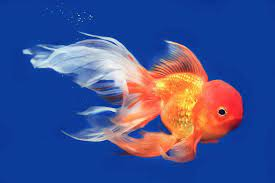

In [7]:
# We will download a image of gold fish and ask the model to classify that image
Image.open('C:\\Users\\Admin\\Documents\\Data Science\\Code_basics\\Deep_Learning\\Project_assets\\Gold_fish.jfif')

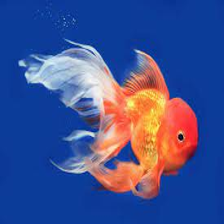

In [10]:
# Resize the image
gold_fish = Image.open('C:\\Users\\Admin\\Documents\\Data Science\\Code_basics\\Deep_Learning\\Project_assets\\Gold_fish.jfif').resize(IMAGE_SHAPE)
gold_fish

In [11]:
# Normalize the image
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [12]:
gold_fish

array([[[0.03137255, 0.21176471, 0.58039216],
        [0.03137255, 0.21176471, 0.58039216],
        [0.03137255, 0.21176471, 0.58039216],
        ...,
        [0.03921569, 0.21568627, 0.58431373],
        [0.03529412, 0.21176471, 0.57647059],
        [0.03529412, 0.21176471, 0.57647059]],

       [[0.03529412, 0.21568627, 0.58431373],
        [0.03529412, 0.21568627, 0.58431373],
        [0.03529412, 0.21568627, 0.58431373],
        ...,
        [0.04313725, 0.21568627, 0.58431373],
        [0.03921569, 0.21568627, 0.58039216],
        [0.03921569, 0.21568627, 0.58039216]],

       [[0.03529412, 0.21568627, 0.58431373],
        [0.03529412, 0.21568627, 0.58431373],
        [0.03529412, 0.21568627, 0.58431373],
        ...,
        [0.04313725, 0.21568627, 0.58431373],
        [0.03921569, 0.21568627, 0.58039216],
        [0.03921569, 0.21568627, 0.58039216]],

       ...,

       [[0.04313725, 0.22352941, 0.59215686],
        [0.04313725, 0.22352941, 0.59215686],
        [0.04313725, 0

In [13]:
# We are adding one more dimension to the image, since the model accepts multiple images
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [15]:
gold_fish[np.newaxis, ...]

array([[[[0.03137255, 0.21176471, 0.58039216],
         [0.03137255, 0.21176471, 0.58039216],
         [0.03137255, 0.21176471, 0.58039216],
         ...,
         [0.03921569, 0.21568627, 0.58431373],
         [0.03529412, 0.21176471, 0.57647059],
         [0.03529412, 0.21176471, 0.57647059]],

        [[0.03529412, 0.21568627, 0.58431373],
         [0.03529412, 0.21568627, 0.58431373],
         [0.03529412, 0.21568627, 0.58431373],
         ...,
         [0.04313725, 0.21568627, 0.58431373],
         [0.03921569, 0.21568627, 0.58039216],
         [0.03921569, 0.21568627, 0.58039216]],

        [[0.03529412, 0.21568627, 0.58431373],
         [0.03529412, 0.21568627, 0.58431373],
         [0.03529412, 0.21568627, 0.58431373],
         ...,
         [0.04313725, 0.21568627, 0.58431373],
         [0.03921569, 0.21568627, 0.58039216],
         [0.03921569, 0.21568627, 0.58039216]],

        ...,

        [[0.04313725, 0.22352941, 0.59215686],
         [0.04313725, 0.22352941, 0.59215686]

In [16]:
# Now predict the image with the model
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

1/1 [==============================] - 1s 1s/step


(1, 1001)

In [17]:
# Use the Numpy Argmax function
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [18]:
# Open the classes file for verification
# tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
image_labels = []
with open("C:\\Users\\Admin\\Documents\\Data Science\\Code_basics\\Deep_Learning\\Project_assets\\ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [19]:
image_labels[predicted_label_index]

'goldfish'

In [20]:
# Now we want to do the classification for the flowers dataset

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 [==============================] - 116s 1us/step


In [21]:
data_dir

'.\\datasets\\flower_photos'

In [22]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [23]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [24]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [25]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

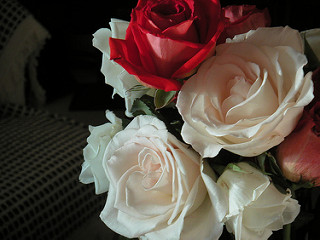

In [28]:
Image.open(str(roses[1]))

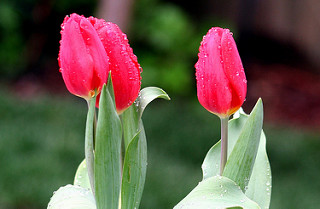

In [30]:
tulips = list(data_dir.glob('tulips/*'))
Image.open(str(tulips[0]))

In [31]:
# Read flowers images from disk into numpy array using opencv
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [32]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [33]:
flowers_images_dict['roses'][:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [34]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [35]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [36]:
img.shape

(240, 179, 3)

In [37]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [38]:
# Fixing the X and y
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [39]:
X = np.array(X)
y = np.array(y)

In [40]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [41]:
# Preprocessing: scale images
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [42]:
# Make prediction using pre-trained model on new flowers dataset

X[0].shape

(224, 224, 3)

In [43]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [44]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

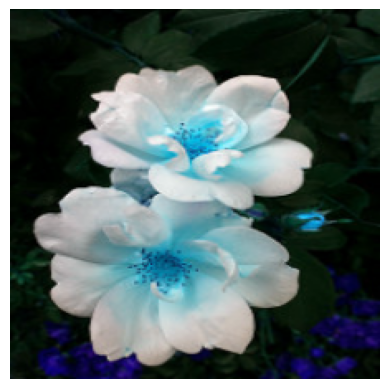

In [45]:
plt.axis('off')
plt.imshow(X[0])

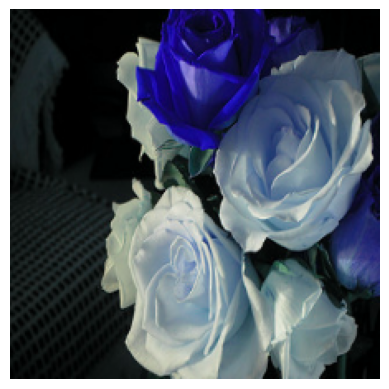

In [46]:
plt.axis('off')
plt.imshow(X[1])

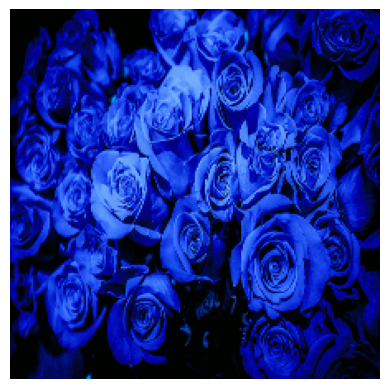

In [47]:
plt.axis('off')
plt.imshow(X[2])

In [48]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 1s 1s/step


array([795, 880, 795], dtype=int64)

In [49]:
image_labels[795]


'shower curtain'

In [50]:
# Now take pre-trained model and retrain it using flowers images
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [51]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [52]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 114s 1s/step - loss: 0.7837 - acc: 0.7126
Epoch 2/5
86/86 [==============================] - 100s 1s/step - loss: 0.4108 - acc: 0.8583
Epoch 3/5
86/86 [==============================] - 102s 1s/step - loss: 0.3164 - acc: 0.8964
Epoch 4/5
86/86 [==============================] - 99s 1s/step - loss: 0.2666 - acc: 0.9172
Epoch 5/5
86/86 [==============================] - 96s 1s/step - loss: 0.2276 - acc: 0.9291


In [53]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 34s 1s/step - loss: 0.3857 - acc: 0.8617


[0.3857296109199524, 0.8616557717323303]